<a href="https://colab.research.google.com/github/ayedsalman/Tensor-Flow/blob/master/Intro_to_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 2.0 Examples
*** More examples to be added later... ***

# Prerequisite 

1. Introduction to [Machine Learning](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/0_Prerequisite/ml_introduction.ipynb).
2. Introduction to [MNIST Dataset](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/0_Prerequisite/mnist_dataset_intro.ipynb).




# Example 1:
A very simple "hello world" using TensorFlow v2 tensors.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
# Create a Tensor.
hello = tf.constant("hello world")
print(hello)

# To access a Tensor value, call numpy().
print(hello.numpy())


tf.Tensor(b'hello world', shape=(), dtype=string)
b'hello world'


# Example 2:
Basic tensor operations using TensorFlow v2.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [ ]:
from __future__ import print_function
import tensorflow as tf
# Define tensor constants.
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)
# Various tensor operations.
# Note: Tensors also support python operators (+, *, ...)
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

In [ ]:
# Some more operations.
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

# Access tensors value.
print("mean =", mean.numpy())
print("sum =", sum.numpy())

In [ ]:
# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)

In [ ]:
# Display Tensor.
product

In [ ]:
# Convert Tensor to Numpy.
product.numpy()

# Example 3: 
Basic classification example 
We need to predict the function that govern the numbers.
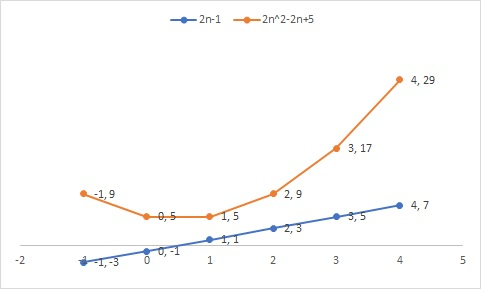

In [20]:
# import libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [21]:
# design your model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [22]:
# compile your model 
model.compile(optimizer='sgd', loss='mean_squared_error')

In [28]:
# provide your training and testing data for function 1: 2n-1
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [23]:
# provide your training and testing data for function 2: 2n^2 - 2n +5
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([9.0, 5.0, 5.0, 9.0, 17.0, 29.0], dtype=float)

In [ ]:
# train your model
model.fit(xs, ys, epochs=1500)

In [30]:
#test and print results
print(model.predict([10.0]))

[[18.999987]]


# Example 4:
English handwritten recognition

In [3]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [4]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [ ]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [6]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [7]:
# Create TF Model.
class NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
neural_net = NeuralNet()

In [8]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = neural_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [ ]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

In [ ]:
# Test model on validation set.
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

In [12]:
# Visualize predictions.
import matplotlib.pyplot as plt

In [ ]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))